In [85]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed/moon_filtered.png


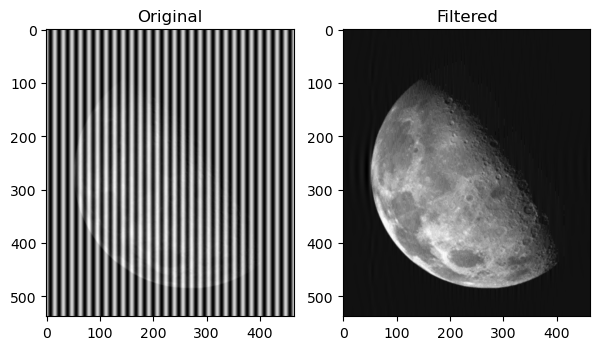

In [86]:
if __name__ == "__main__" :
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)

    #from tutorials
    def magnitude(fft_im):
        real = fft_im.real
        imag = fft_im.imag
        return np.sqrt(real**2 + imag**2)

    im_fft = np.fft.fft2(im)
    
    #make kernel
    filter_kernel = np.ones_like(im)

    # start and end for row and col
    height = 5 
    width = 50 
    startrow = (im.shape[0] - height) // 2
    endrow = startrow + 2 * height
    startcol = (im.shape[1] - width) // 2
    endcol = startcol + width

    #set filter values
    filter_kernel[startrow:endrow, :] = 0
    filter_kernel[startrow:endrow, startcol:endcol] = 1

    #shift the kernel to center
    im_fft_shift = np.fft.ifftshift(filter_kernel)

    #apply filter in frequency domain
    result_fft = im_fft * im_fft_shift 

    # inverse Fourier transform
    im_filtered = np.fft.ifft2(result_fft).real 

    #fft
    fft_kernel = np.fft.fft2(im_fft_shift) 
    
    #original
    plt.figure(figsize=(30, 4))
    plt.subplot(1, 8, 1)
    plt.title("Original")
    plt.imshow(im, cmap="gray")

    # #FFT
    # plt.subplot(1, 8, 2)
    # plt.title("FFT image")
    # plt.imshow(np.fft.fftshift(np.log(magnitude(im_fft) + 1)), cmap="gray")

    # #FFT kernel
    # plt.subplot(1, 8, 3)
    # plt.title("FFT kernel")
    # plt.imshow(np.fft.fftshift(np.log(fft_kernel + 1)).real, cmap="gray")

    # #FFT image filtered"
    # plt.subplot(1, 8, 4)
    # plt.title("FFT image filtered")
    # plt.imshow(np.fft.fftshift(np.log(result_fft + 1)).real, cmap="gray")

    #filtered
    plt.subplot(1, 8, 2)
    plt.title("Filtered")
    plt.imshow(im_filtered, cmap="gray")

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))